In [158]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests
import sys

sys.path.insert(1,'C:/Users/chris/CU-Repositories/')

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime


In [159]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [160]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [161]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [162]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [163]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [164]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | bredasdorp
Processing Record 2 of Set 13 | amderma
City not found. Skipping...
Processing Record 3 of Set 13 | auki
Processing Record 4 of Set 13 | meulaboh
Processing Record 5 of Set 13 | sheridan
Processing Record 6 of Set 13 | kahului
Processing Record 7 of Set 13 | arraial do cabo
Processing Record 8 of Set 13 | puerto ayora
Processing Record 9 of Set 13 | yavas
Processing Record 10 of Set 13 | mbini
Processing Record 11 of Set 13 | saint-philippe
Processing Record 12 of Set 13 | ushuaia
Processing Record 13 of Set 13 | saldanha
Processing Record 14 of Set 13 | altay
Processing Record 15 of Set 13 | oneonta
Processing Record 16 of Set 13 | mataura
Processing Record 17 of Set 13 | bluff
Processing Record 18 of Set 13 | dikson
Processing Record 19 of Set 13 | lebu
Processing Record 20 of Set 13 | gryazovets
Processing Record 21 of Set 13 | thompson
Processing Record 22 of Set 13 | neiafu
Processing Record 23 of Set 13 | punta arenas
Processing Record 2

Processing Record 36 of Set 16 | carutapera
Processing Record 37 of Set 16 | wamba
Processing Record 38 of Set 16 | shenjiamen
Processing Record 39 of Set 16 | taoudenni
Processing Record 40 of Set 16 | san quintin
Processing Record 41 of Set 16 | marcona
City not found. Skipping...
Processing Record 42 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 16 | kampong thum
Processing Record 44 of Set 16 | the valley
Processing Record 45 of Set 16 | bilibino
Processing Record 46 of Set 16 | ngorongoro
Processing Record 47 of Set 16 | bambous virieux
Processing Record 48 of Set 16 | evansville
Processing Record 49 of Set 16 | mount gambier
Processing Record 50 of Set 16 | borama
City not found. Skipping...
Processing Record 1 of Set 17 | hokitika
Processing Record 2 of Set 17 | burnie
Processing Record 3 of Set 17 | dabakala
Processing Record 4 of Set 17 | aswan
Processing Record 5 of Set 17 | yulara
Processing Record 6 of Set 17 | abu samrah
Processing Record

Processing Record 17 of Set 20 | englewood
Processing Record 18 of Set 20 | port hardy
Processing Record 19 of Set 20 | aksay
Processing Record 20 of Set 20 | tual
Processing Record 21 of Set 20 | springdale
Processing Record 22 of Set 20 | kathmandu
Processing Record 23 of Set 20 | islahiye
Processing Record 24 of Set 20 | mishan
Processing Record 25 of Set 20 | kaili
Processing Record 26 of Set 20 | osorio
Processing Record 27 of Set 20 | filadelfia
Processing Record 28 of Set 20 | itarema
Processing Record 29 of Set 20 | waipawa
Processing Record 30 of Set 20 | tecpan
Processing Record 31 of Set 20 | pueblo nuevo
Processing Record 32 of Set 20 | mergui
City not found. Skipping...
Processing Record 33 of Set 20 | cap-aux-meules
Processing Record 34 of Set 20 | abu kamal
Processing Record 35 of Set 20 | yeppoon
Processing Record 36 of Set 20 | brownsburg
Processing Record 37 of Set 20 | teya
Processing Record 38 of Set 20 | ust-nera
Processing Record 39 of Set 20 | meilu
City not foun

Processing Record 3 of Set 24 | bambanglipuro
Processing Record 4 of Set 24 | rio grande
Processing Record 5 of Set 24 | hlatikulu
Processing Record 6 of Set 24 | kommunisticheskiy
Processing Record 7 of Set 24 | jinxiang
Processing Record 8 of Set 24 | nchelenge
Processing Record 9 of Set 24 | belomorsk
Processing Record 10 of Set 24 | caraballeda
Processing Record 11 of Set 24 | kevelaer
Processing Record 12 of Set 24 | kingisepp
Processing Record 13 of Set 24 | bandar-e lengeh
Processing Record 14 of Set 24 | salamiyah
Processing Record 15 of Set 24 | mao
Processing Record 16 of Set 24 | nabire
Processing Record 17 of Set 24 | fortuna
Processing Record 18 of Set 24 | goianesia
Processing Record 19 of Set 24 | lisakovsk
Processing Record 20 of Set 24 | wukari
Processing Record 21 of Set 24 | huarmey
Processing Record 22 of Set 24 | sandata
Processing Record 23 of Set 24 | sharkan
Processing Record 24 of Set 24 | inhambane
Processing Record 25 of Set 24 | zhangye
Processing Record 26 

In [165]:
len(city_data)

557

In [166]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,66.20,72,4,13.80,ZA,2021-03-23 02:27:49
1,Auki,-8.7676,160.7034,87.22,63,63,2.75,SB,2021-03-23 02:27:49
2,Meulaboh,4.1363,96.1285,79.63,79,90,2.84,ID,2021-03-23 02:27:49
3,Sheridan,44.8333,-106.9173,39.20,70,90,6.91,US,2021-03-23 02:24:06
4,Kahului,20.8947,-156.4700,77.00,69,40,20.71,US,2021-03-23 02:27:49
5,Arraial Do Cabo,-22.9661,-42.0278,76.32,85,23,4.85,BR,2021-03-23 02:27:50
6,Puerto Ayora,-0.7393,-90.3518,78.01,91,25,3.00,EC,2021-03-23 02:27:50
7,Yavas,54.4159,42.8491,24.01,99,100,2.53,RU,2021-03-23 02:27:50
8,Mbini,1.5740,9.6134,77.00,100,40,4.05,GQ,2021-03-23 02:27:50
9,Saint-Philippe,-21.3585,55.7679,78.80,73,0,5.75,RE,2021-03-23 02:27:51


In [167]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [168]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-03-23 02:27:49,-34.5322,20.0403,66.20,72,4,13.80
1,Auki,SB,2021-03-23 02:27:49,-8.7676,160.7034,87.22,63,63,2.75
2,Meulaboh,ID,2021-03-23 02:27:49,4.1363,96.1285,79.63,79,90,2.84
3,Sheridan,US,2021-03-23 02:24:06,44.8333,-106.9173,39.20,70,90,6.91
4,Kahului,US,2021-03-23 02:27:49,20.8947,-156.4700,77.00,69,40,20.71
...,...,...,...,...,...,...,...,...,...
552,Namibe,AO,2021-03-23 02:29:47,-15.1961,12.1522,71.33,78,30,4.21
553,Epitalion,GR,2021-03-23 02:29:47,37.6333,21.5000,48.20,93,75,5.55
554,Salmas,IR,2021-03-23 02:25:02,38.1973,44.7653,41.00,70,0,4.61
555,Ausa,ES,2021-03-23 02:29:48,41.9271,2.2497,41.00,83,2,3.13


In [169]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [170]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

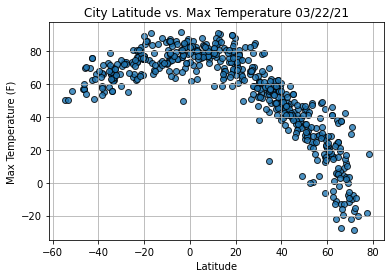

In [171]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

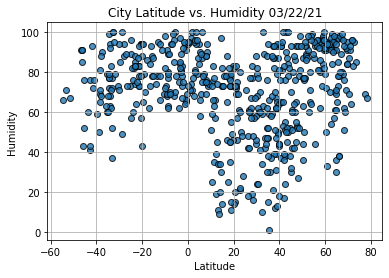

In [172]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

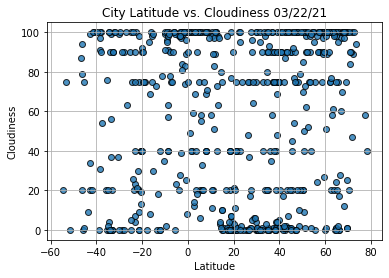

In [173]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

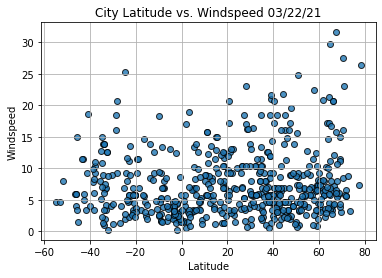

In [174]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [175]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [176]:
index13 = city_data_df.loc[13]
index13

City                      Oneonta
Country                        US
Date          2021-03-23 02:25:38
Lat                       42.4529
Lng                      -75.0638
Max Temp                       43
Humidity                       55
Cloudiness                      1
Wind Speed                   4.14
Name: 13, dtype: object

In [177]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Meulaboh,ID,2021-03-23 02:27:49,4.1363,96.1285,79.63,79,90,2.84
3,Sheridan,US,2021-03-23 02:24:06,44.8333,-106.9173,39.20,70,90,6.91
4,Kahului,US,2021-03-23 02:27:49,20.8947,-156.4700,77.00,69,40,20.71
7,Yavas,RU,2021-03-23 02:27:50,54.4159,42.8491,24.01,99,100,2.53
8,Mbini,GQ,2021-03-23 02:27:50,1.5740,9.6134,77.00,100,40,4.05
...,...,...,...,...,...,...,...,...,...
550,Kutum,SD,2021-03-23 02:29:47,14.2000,24.6667,75.63,20,4,3.60
551,Sfantu Gheorghe,RO,2021-03-23 02:29:47,45.8667,25.7833,28.00,80,92,2.17
553,Epitalion,GR,2021-03-23 02:29:47,37.6333,21.5000,48.20,93,75,5.55
554,Salmas,IR,2021-03-23 02:25:02,38.1973,44.7653,41.00,70,0,4.61


In [178]:
city_data_df.loc[(city_data_df["Lat"] < 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-03-23 02:27:49,-34.5322,20.0403,66.20,72,4,13.80
1,Auki,SB,2021-03-23 02:27:49,-8.7676,160.7034,87.22,63,63,2.75
5,Arraial Do Cabo,BR,2021-03-23 02:27:50,-22.9661,-42.0278,76.32,85,23,4.85
6,Puerto Ayora,EC,2021-03-23 02:27:50,-0.7393,-90.3518,78.01,91,25,3.00
9,Saint-Philippe,RE,2021-03-23 02:27:51,-21.3585,55.7679,78.80,73,0,5.75
...,...,...,...,...,...,...,...,...,...
543,Nelson Bay,AU,2021-03-23 02:29:45,-32.7167,152.1500,69.01,100,90,12.66
548,Itapicuru,BR,2021-03-23 02:29:46,-11.3167,-38.2333,73.00,91,78,4.76
549,Rocha,UY,2021-03-23 02:29:47,-34.4833,-54.3333,63.12,79,100,1.25
552,Namibe,AO,2021-03-23 02:29:47,-15.1961,12.1522,71.33,78,30,4.21


In [179]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

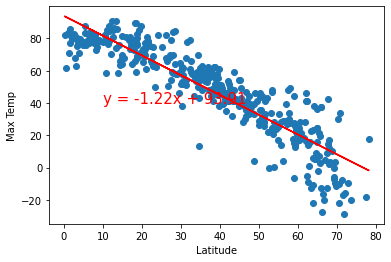

In [180]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

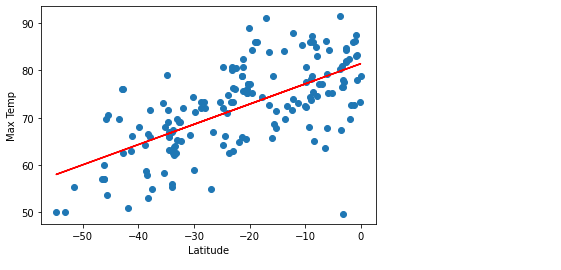

In [181]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

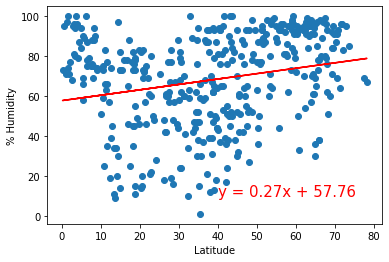

In [182]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

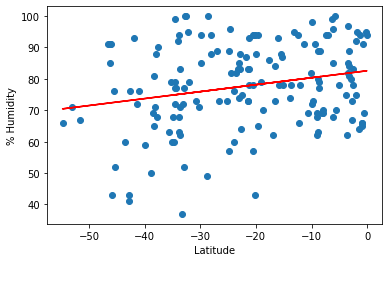

In [183]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

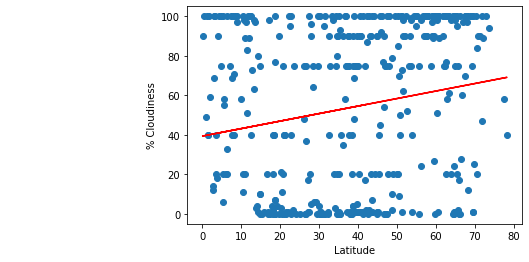

In [184]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

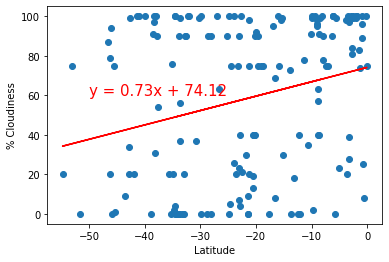

In [185]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

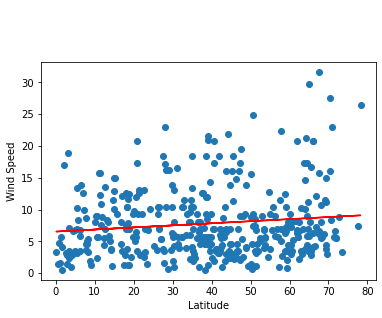

In [186]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,40))

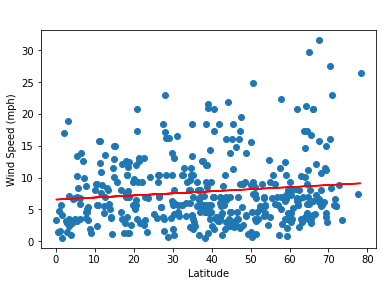

In [187]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,35))

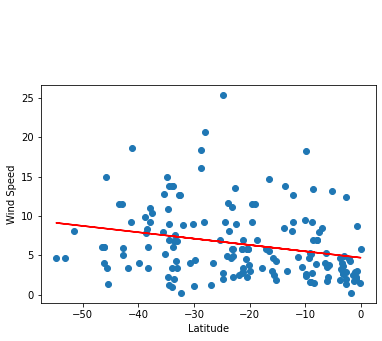

In [188]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))